In [13]:
import requests
from bs4 import BeautifulSoup
import csv

# Send an HTTP request to the website
response = requests.get("https://turbolab.in/culture/", verify=False)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all the quotes and their corresponding name and designation
quotes = soup.find_all("div", {"class": "et_pb_testimonial_content"})
names = soup.find_all("span", {"class": "et_pb_testimonial_author"})
designations = soup.find_all("span", {"class": "et_pb_testimonial_position"})

# Check that all lists have the same length
if len(quotes) == len(names) == len(designations):
    quote_data = []

    # Extract the data and store it in a list
    for i in range(len(quotes)):
        text = quotes[i].text.strip()
        name = names[i].text.strip()
        designation = designations[i].text.strip()
        quote_data.append((text, name, designation))

    # Write the data to a CSV file
    with open("quotes.csv", "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["Quote", "Name", "Designation"])
        writer.writerows(quote_data)
else:
    print("Error: Lists have different lengths.")


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [14]:
import pandas as pd
df=pd.read_csv(r"quotes.csv")
df.head(5)


,Quote,Name,Designation
0,We went Remote before it became mainstream! Tu...,Nikhil Paul,Lead
1,As the name says it is a lab where we can expe...,Sachin,Lead
2,"It is one of the best places to learn things, ...",Archana,Data Analyst
3,"Turbolab culture, to me, is basically about pr...",Nagaraj,Python Developer
4,"For a fresher, probably the best company to wo...",Agus,Python Developer


In [15]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# print(",jbmghmf")

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Load the data from the CSV file
data = pd.read_csv('quotes.csv')

# Concatenate all the quotes into a single string
quotes_str = ' '.join(data['Quote'])

# Tokenize the string into words
words = nltk.word_tokenize(quotes_str)

# Remove stopwords and non-alphabetic words
stopwords_set = set(stopwords.words('english'))
words_alpha = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords_set]

# Count the frequency of each word
word_counts = Counter(words_alpha)

# Print the top 10 most frequent words
for word, count in word_counts.most_common(10):
    print(f'{word}: {count}')


work: 24
turbolab: 17
working: 13
place: 11
learn: 10
time: 10
great: 8
friendly: 6
environment: 6
best: 6


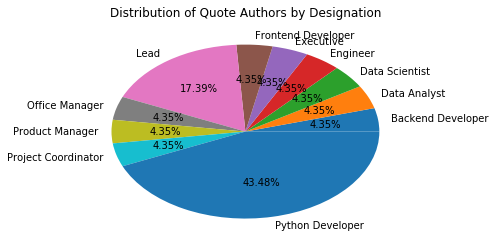

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv("quotes.csv")

# Group the data by designation and count the number of unique authors per designation
designation_authors = df.groupby("Designation")["Name"].nunique()

# Create a pie chart of the author counts
plt.pie(designation_authors.values, labels=designation_authors.index, autopct="%1.2f%%")
plt.title("Distribution of Quote Authors by Designation")
plt.show()

